In [11]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation


In [2]:
con = sqlite3.connect('../data/interim/articles_with_author_mapping.db')
cur = con.cursor()

df = pd.read_sql_query("SELECT published_at FROM articles where organization='lvz'", con)

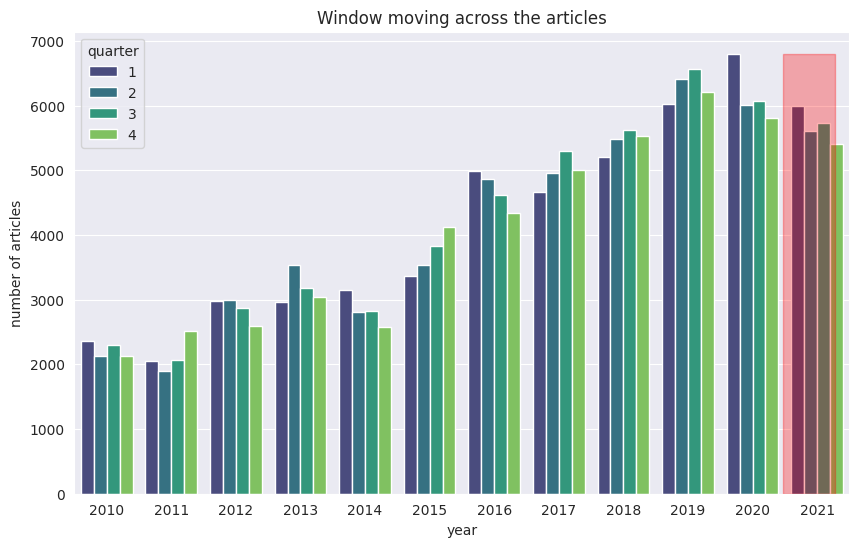

In [45]:
# Assuming your DataFrame is named 'df' and has a column 'published_at'
# Convert 'published_at' column to datetime if it's not already in datetime format
df['published_at'] = pd.to_datetime(df['published_at'])

# Create a new column 'year' and 'quarter' to extract the year and quarter from the 'published_at' column
df['year'] = df['published_at'].dt.year
df['quarter'] = df['published_at'].dt.quarter

# Group by 'year' and 'quarter' and count the number of articles in each quarter
article_counts = df.groupby(['year', 'quarter']).size().reset_index(name='article_count')

# Set up the initial bar plot using Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='year', y='article_count', hue='quarter', data=article_counts, palette='viridis')

# Set up the rectangle parameters
rect_width = 4 * bars.patches[0].get_width()  # Width to overlap 4 bars
rect_height = max(article_counts['article_count'])  # Height of the moving rectangle (same as the plot)

# Create the initial rectangle
rect = Rectangle((0, 0), rect_width, rect_height, alpha=0.3, color='red')
plt.gca().add_patch(rect)

# Function to update the plot for each animation frame
def update(frame):
    n_years = 11
    patches_pos = frame * (bars.patches[n_years].get_x() - bars.patches[0].get_x()) / 48
    # Update the position of the rectangle
    new_pos = patches_pos - (rect_width - bars.patches[0].get_width()) / 2
    
    rect.set_x(new_pos)

    return (rect,)  # Return a tuple containing only the rectangle

# Set the number of frames (equal to the number of years in your data)
num_frames = len(article_counts)

# Create the animation
animation = FuncAnimation(plt.gcf(), update, frames=num_frames, interval=400, blit=True)

# Customize the plot
plt.title('Window moving across the articles')
plt.xlabel('year')
plt.ylabel('number of articles')

# Save the animation as a GIF
animation.save('../reports/figures/moving_window.gif', writer='imagemagick')

plt.show()